In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
#Points we are taking into Consideration
#GRE SCORE
#TOEFL
#UNIVERSITY RATING, SOP,LOR,GPA
#RESEARCH EXPERIENCE

In [3]:
data = pd.read_csv('Admission_Predict.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.drop('Serial No.',axis = 1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
rankdata = data.groupby(by= 'University Rating').mean()

In [12]:
rankdata

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B59EAD0E88>,
      dtype=object)

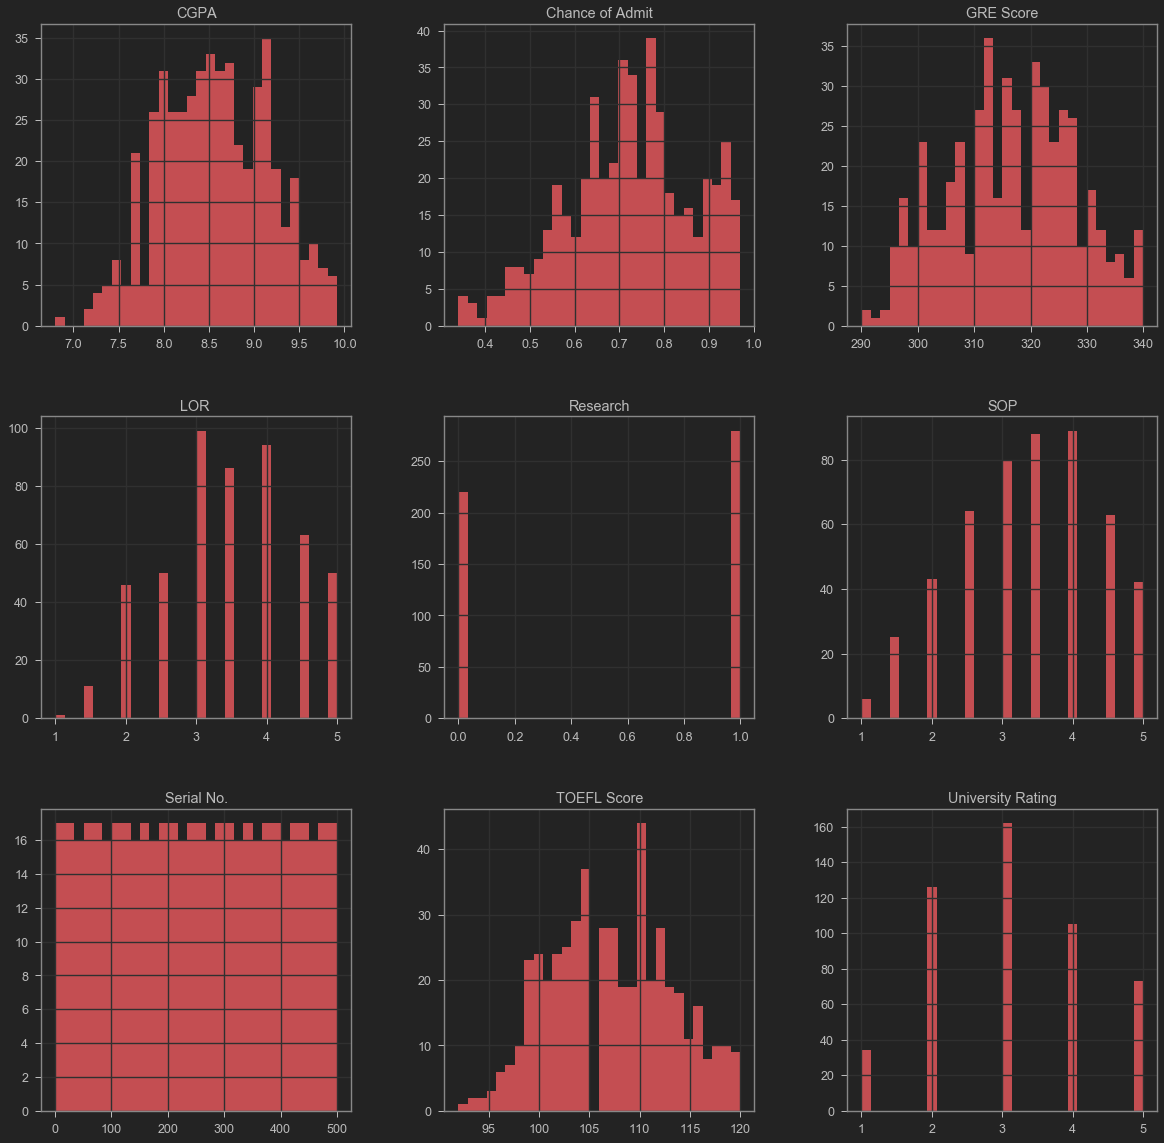

In [13]:
data.hist(bins=30,figsize = (20,20),color='r')

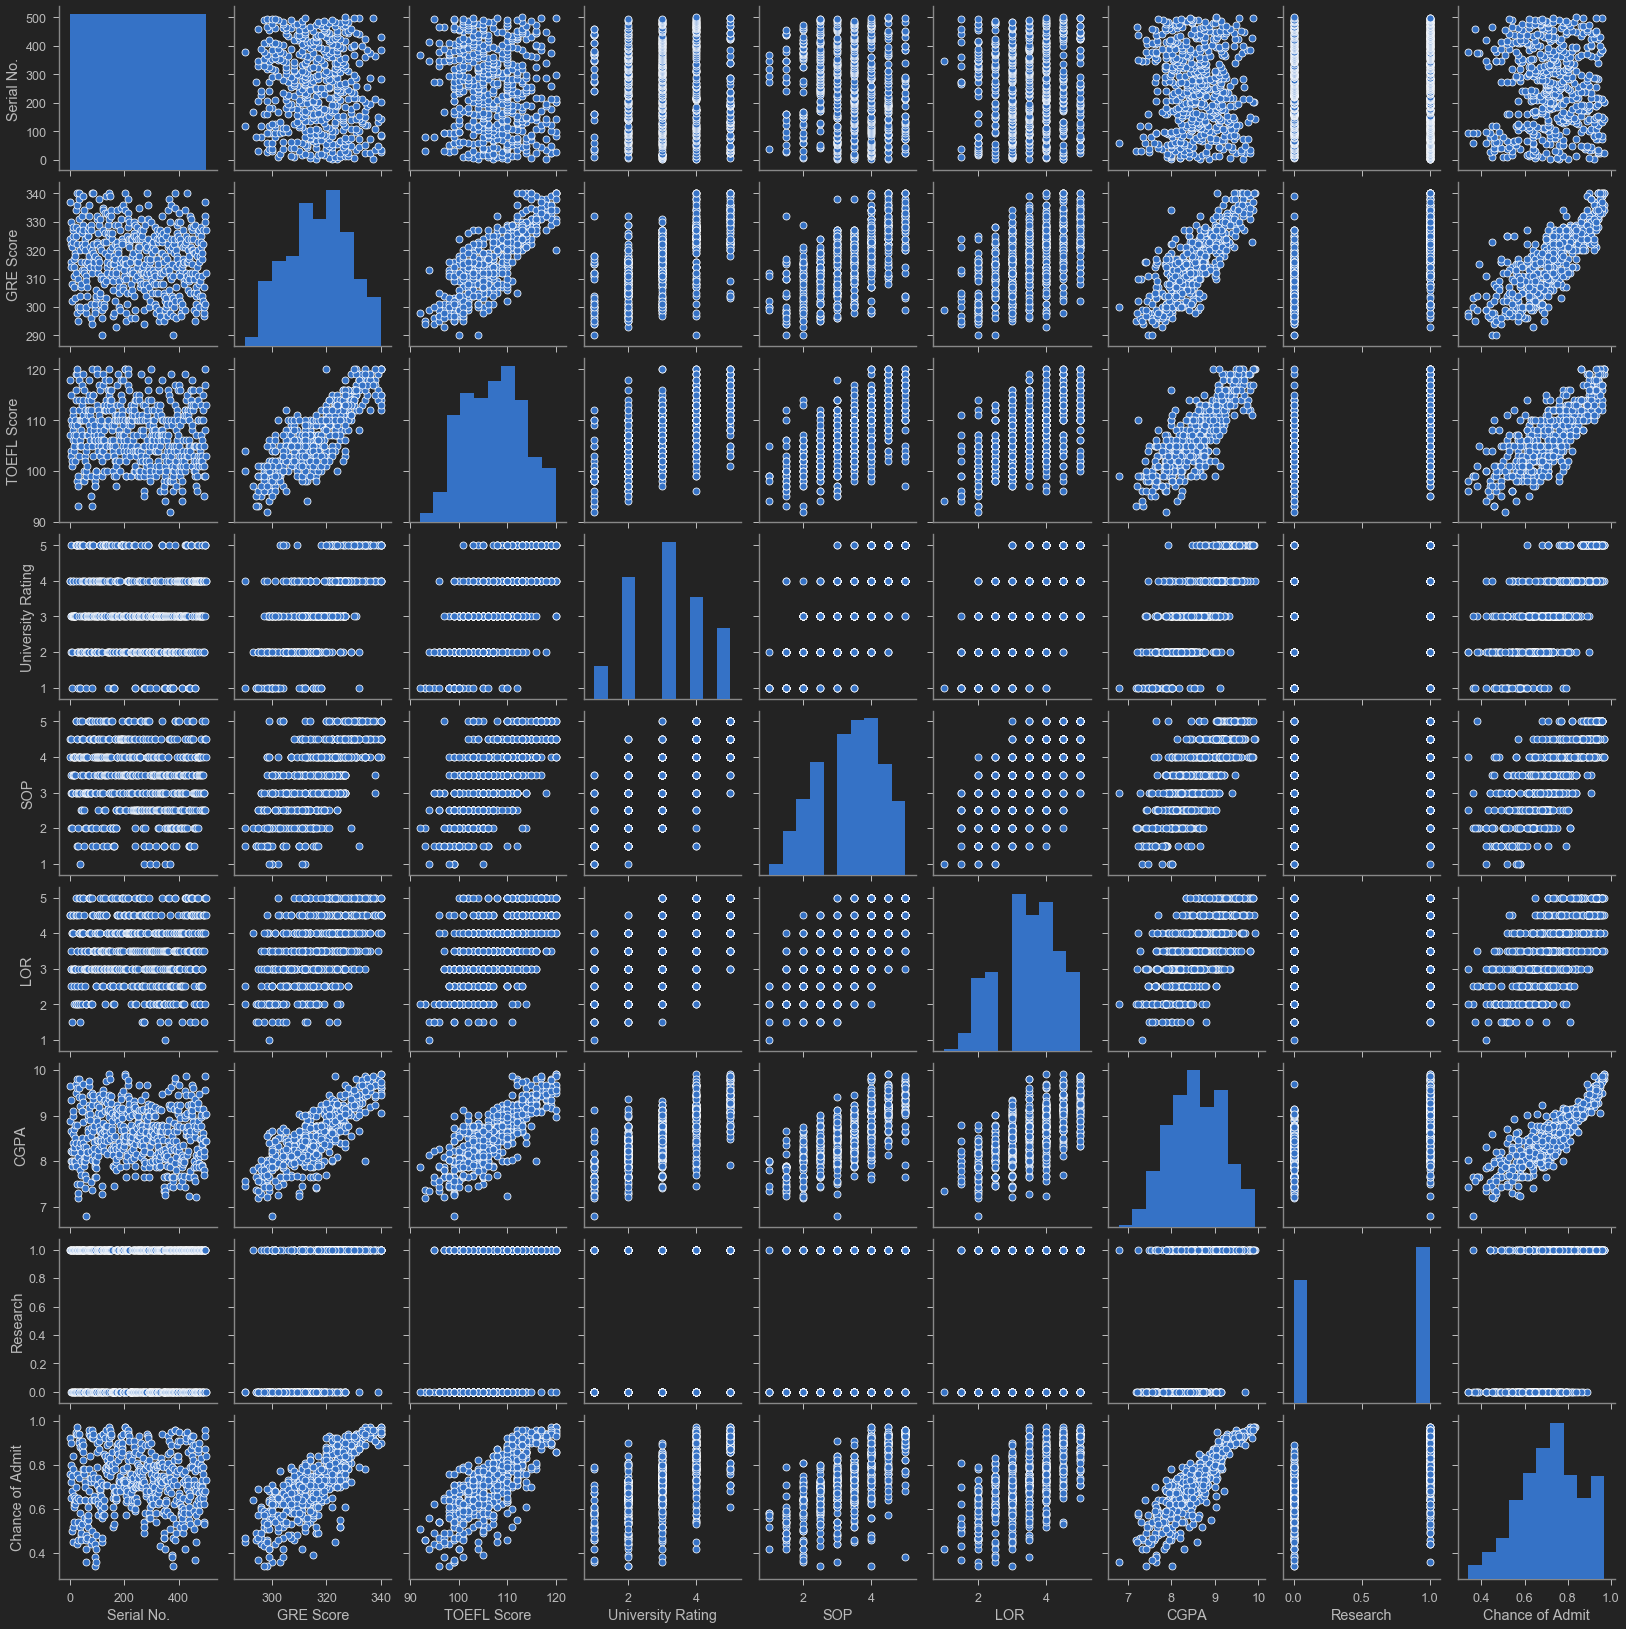

In [15]:
sns.pairplot(data)

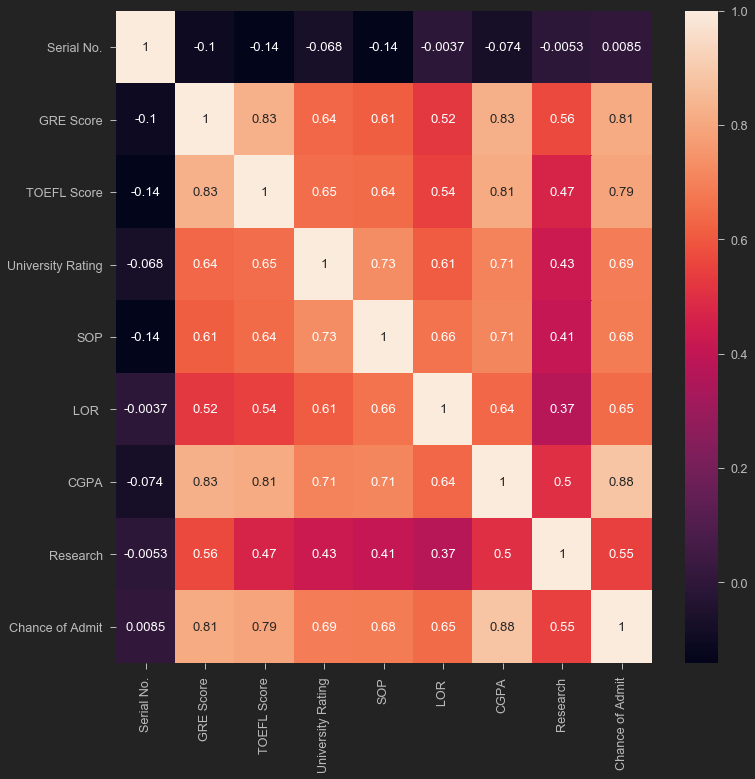

In [16]:
cor = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot = True)
plt.show()

In [17]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [18]:
x = data.drop(columns = ['Chance of Admit'])

In [19]:
y = data['Chance of Admit']

In [20]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [21]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [22]:
x = np.array(x)

In [23]:
y = np.array(y)

In [25]:
y = y.reshape(-1,1)

In [26]:
y.shape

(500, 1)

In [30]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scalar_x = StandardScaler()
x = scalar_x.fit_transform(x)

In [31]:
scalar_y = StandardScaler()
y = scalar_x.fit_transform(y)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.15)

In [33]:
#From now on ,Evaluation

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [38]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
acc = model.score(x_test,y_test)

In [47]:
acc

0.8971904713068225

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
          
           
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
DecisionTree : 0.5129344822106586
Linear Regression : 0.34609421178977884


C:\Users\shanm\anaconda3\lib\site-packages\ipykernel_launcher.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForest : 0.3712011136936512
KNeighbours : 0.4647626821107087
SVM : 0.35086653295720027


C:\Users\shanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier : 0.40163732157084403
GradientBoostingClassifier:  0.3404603635387746
Lasso:  1.084224654999307


C:\Users\shanm\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ridge:  0.3455171001716403
BayesianRidge:  0.3437699263613526
ElasticNet:  0.807111212779739


C:\Users\shanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HuberRegressor:  0.36294098799663427


In [62]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [64]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(x_train, y_train)

linreg_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linreg_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)


Root Mean Squared Error :  0.34609421178977884
R-Squared Error: 0.8971904713068225


In [65]:
#Support Vector Machine

In [66]:
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)

svr_pred = svr.predict(x_test)

mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.36379185203990166
R-Squared Error: 0.8864072452630701


C:\Users\shanm\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
#Random Forest Regression

In [68]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

rfr_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, rfr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.34609421178977884
R-Squared Error: 0.8971904713068225


C:\Users\shanm\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


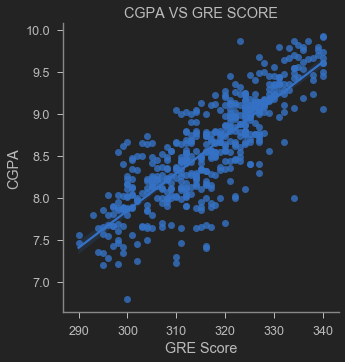

In [72]:
fig=sns.lmplot(x='GRE Score',y='CGPA',data=data)
plt.title("CGPA VS GRE SCORE")
plt.show()




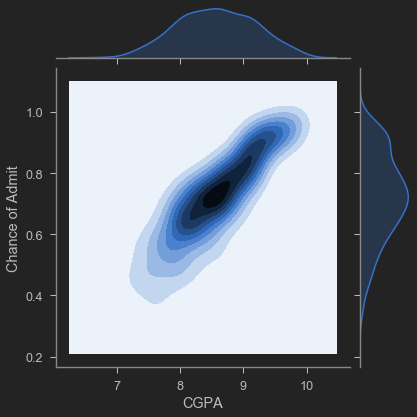

In [74]:
fig=sns.jointplot(x='CGPA',y='Chance of Admit',data=data,kind='kde')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [76]:
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(x_train,y_train)

In [77]:
def get_cv_scores(linear_regression):
    scores = cross_val_score(linear_regression,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

# get cross val scores
get_cv_scores(linear_regression)

CV Mean:  0.7982878907399632
STD:  0.03678066519097357




In [80]:
model = LinearRegression(normalize=True)
model.fit(x_test, y_test)
model.score(x_test, y_test)

0.9141432244231896

In [85]:
#OUTLIER DETECTION USING Z-SCORE METHOD

In [86]:
def outlier(data):
    out1=[]
    for col in data.columns:
        outliers =[]
        mean = data[col].mean()
        std = data[col].std()
        for i in data[col]:
                z = (i - mean)/std
                if z>2:
                    outliers.append(i)
        out1.append(list(outliers))
        print("There are {} outliers in {} feature".format(len(outliers),col))
    return out1

In [87]:
out = outlier(data)

There are 0 outliers in Serial No. feature
There are 9 outliers in GRE Score feature
There are 9 outliers in TOEFL Score feature
There are 0 outliers in University Rating feature
There are 0 outliers in SOP feature
There are 0 outliers in LOR  feature
There are 9 outliers in CGPA feature
There are 0 outliers in Research feature
There are 0 outliers in Chance of Admit feature


In [88]:
j =0
columns =data.columns
for i in out:
    for val in data[columns[j]]:
        if val in i:
            data[columns[j]]= data[columns[j]].replace(val,np.nan)
    j =j+1

In [89]:
data.isnull().sum()

Serial No.           0
GRE Score            9
TOEFL Score          9
University Rating    0
SOP                  0
LOR                  0
CGPA                 9
Research             0
Chance of Admit      0
dtype: int64